In [1]:
# Importing Libraries and dependencies
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers,models
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
# Directory of images
data_dir="/content/drive/MyDrive/Technical certs of colleges/datasssz"

In [3]:
# Appending images
image_paths = []
for filename in os.listdir(data_dir):
    image_path = os.path.join(data_dir, filename)
    image_paths.append(image_path)

In [4]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(image_paths, test_size=0.2, random_state=42)

In [5]:
# Function to load images
import cv2
def load_images(image_path):
  images=[]
  for image_path in image_paths:
    img=cv2.imread(image_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img=img/255.0
    images.append(img)
  return np.array(images)
X_train=load_images(X_train)
X_test=load_images(X_test)

In [6]:
X_train.shape

(12, 128, 128, 3)

In [7]:
X_train=X_train.reshape(len(X_train),128*128*3)
X_test=X_test.reshape(len(X_test),128*128*3)

In [8]:
X_train.shape

(12, 49152)

In [9]:
# Function to show Images based on input height*width
def show_visual(data, title,n=10, height=128, width=128):
  plt.figure(figsize=(10, 5))
  for i in range(n):
    ax=plt.subplot(1,n,i+1)
    plt.imshow(data[i].reshape(height,width,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.suptitle(title,fontsize=20)

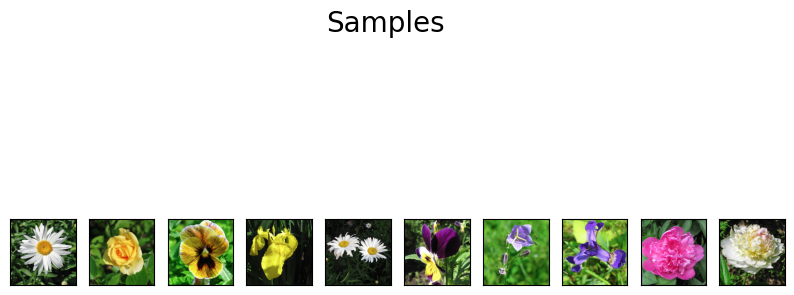

In [10]:
show_visual(X_train,title="Samples")

In [11]:
# Dimensions taken for this dataset
input_dim,output_dim=49152,49152
encode_dim=1323
hidden_dim=1323

In [12]:
# Encoder
input_layer=Input(shape=input_dim,name="INPUT")
hidden_layer_1=Dense(128,activation='relu',name="HIDDEN_1")(input_layer)
# Bottle Neck
bottle_neck=Dense(encode_dim,activation='relu',name="BOTTLE_NECK")(hidden_layer_1)
# Decoder
hidden_layer_2=Dense(128,activation='relu',name="HIDDEN_2")(bottle_neck)
# Ouput layer
output_layer=Dense(output_dim,activation='sigmoid',name='OUTPUT')(hidden_layer_2)

In [13]:
# Model
model=Model(input_layer,output_layer)
model.compile(optimizer="adam",loss='binary_crossentropy')

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 49152)]           0         
                                                                 
 HIDDEN_1 (Dense)            (None, 128)               6291584   
                                                                 
 BOTTLE_NECK (Dense)         (None, 1323)              170667    
                                                                 
 HIDDEN_2 (Dense)            (None, 128)               169472    
                                                                 
 OUTPUT (Dense)              (None, 49152)             6340608   
                                                                 
Total params: 12972331 (49.49 MB)
Trainable params: 12972331 (49.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Training the model
model.fit(X_train,X_train,epochs=55)

Epoch 1/55
1/1 [==============================] - 3s 3s/step - loss: 0.6932
Epoch 2/55
1/1 [==============================] - 0s 15ms/step - loss: 0.6926
Epoch 3/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6844
Epoch 4/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6554
Epoch 5/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6477
Epoch 6/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6159
Epoch 7/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6193
Epoch 8/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6163
Epoch 9/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6157
Epoch 10/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6113
Epoch 11/55
1/1 [==============================] - 0s 16ms/step - loss: 0.6057
Epoch 12/55
1/1 [==============================] - 0s 14ms/step - loss: 0.6035
Epoch 13/55
1/1 [==============================] - 0s 21ms/step

In [16]:
# The decoded values
decoded_data=model.predict(X_test)

1/1 [==============================] - 0s 151ms/step


In [17]:
get_encoded_data=Model(inputs=model.input,outputs=model.get_layer('BOTTLE_NECK').output)

In [18]:
encoded_data=get_encoded_data.predict(X_test)

1/1 [==============================] - 0s 42ms/step


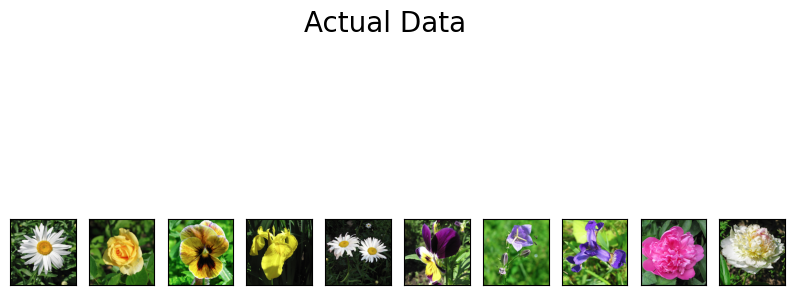

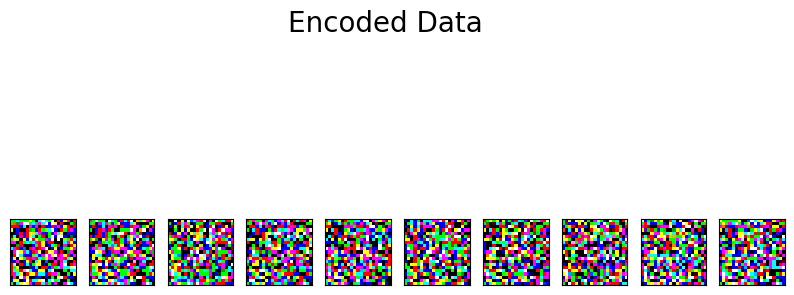

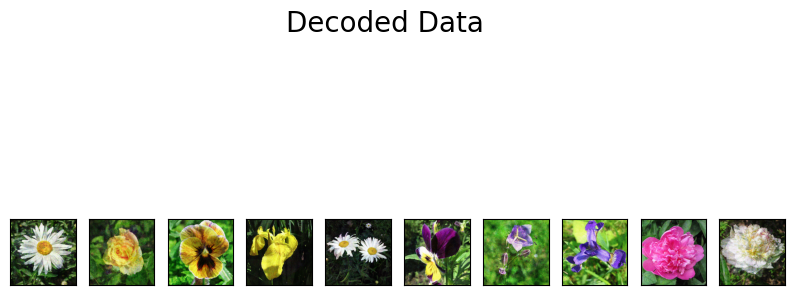

In [19]:
# Showing the actual data to encoded data to decoded data
show_visual(X_test,title="Actual Data")
show_visual(encoded_data,title="Encoded Data",height=21,width=21)
show_visual(decoded_data,title="Decoded Data")